In [6]:
#NB:pour que le code puisse fonctionner sur jupyter notbook: j'ai du taper ces commandes sur mon terminal afin d'avoir les résultats sans erreur
#  python -m textblob.download_corpora )
#  pip install textblob tqdm )
#  pip install notebook
#  pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn


ModuleNotFoundError: No module named 'nltk'

In [16]:
!pip install wordcloud


In [17]:
!pip install nltk

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


   tweet_id user_name    user_type  \
0         1   user_33          bot   
1         2   user_83          bot   
2         3   user_94  influenceur   
3         4   user_81    compagnie   
4         5   user_22    compagnie   

                                                text          company  \
0              Personnel très serviable et souriant.         Emirates   
1         Bagage perdu et aucune assistance fournie.  British Airways   
2              Personnel très serviable et souriant.        Lufthansa   
3            Mauvaise organisation à l'embarquement.         Emirates   
4  Excellent service client, problème résolu rapi...       Air France   

         date sentiment  
0  2023-07-20   négatif  
1  2023-05-09    neutre  
2  2023-08-23   négatif  
3  2023-04-25   négatif  
4  2023-01-25    neutre  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  -

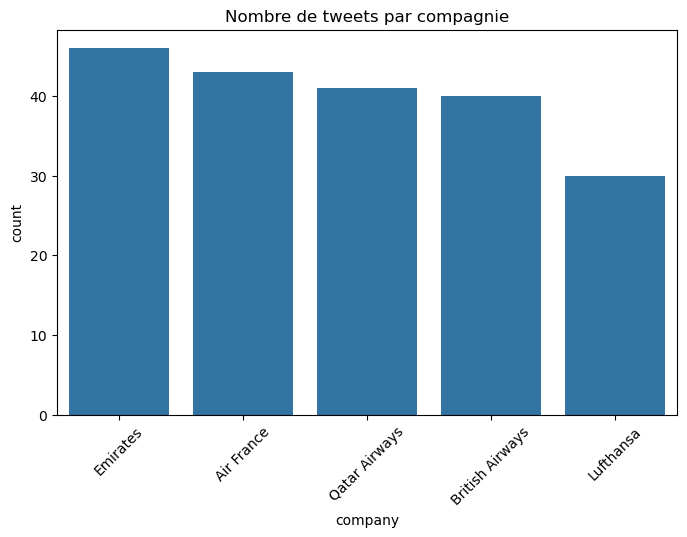

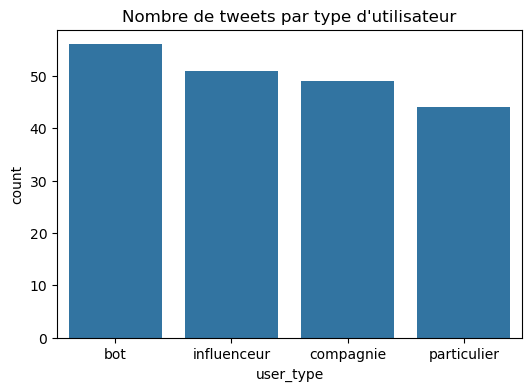

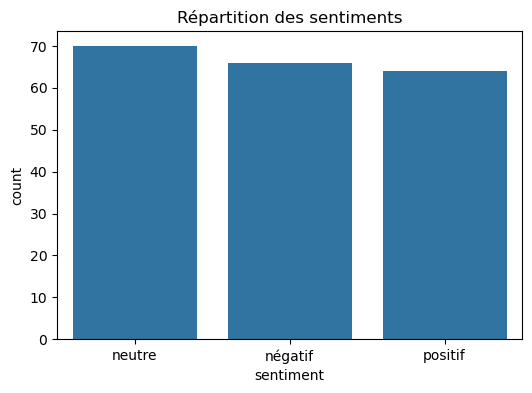

     user_type  nombre_tweets  moyenne_tweets
0          bot             56              56
1    compagnie             49              49
2  influenceur             51              51
3  particulier             44              44
                                                text  \
0              Personnel très serviable et souriant.   
1         Bagage perdu et aucune assistance fournie.   
2              Personnel très serviable et souriant.   
3            Mauvaise organisation à l'embarquement.   
4  Excellent service client, problème résolu rapi...   

                                          clean_text  
0                  personnel très serviable souriant  
1             bagage perdu aucune assistance fournie  
2                  personnel très serviable souriant  
3                mauvaise organisation lembarquement  
4  excellent service client problème résolu rapid...  
[('très', 59), ('vol', 40), ('personnel', 38), ('mauvaise', 37), ('service', 32), ('retard', 25), ('plu

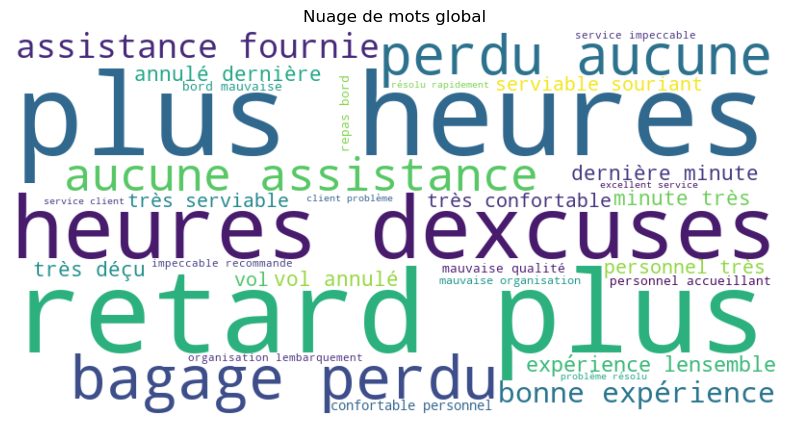

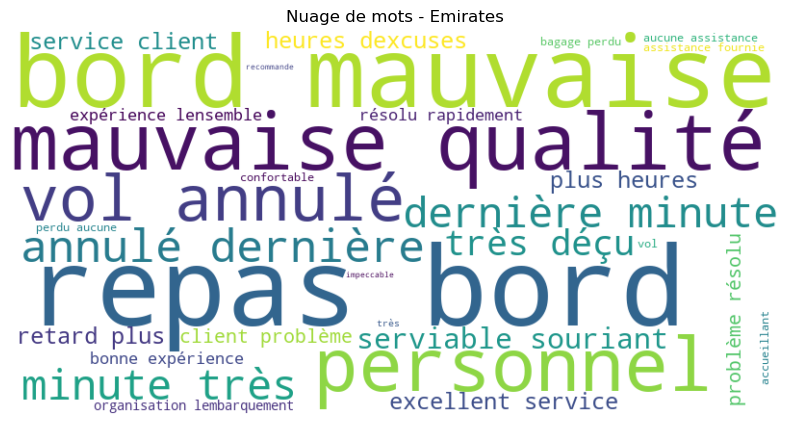

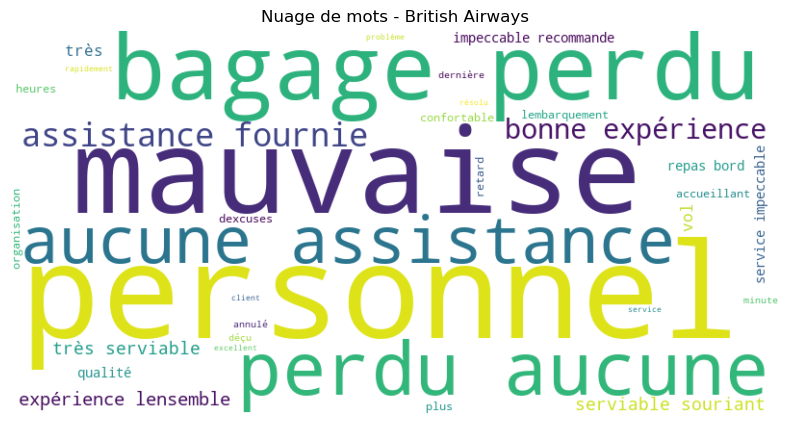

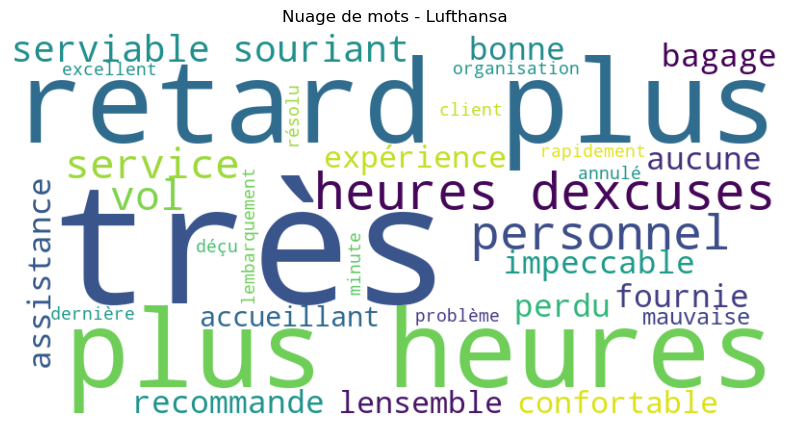

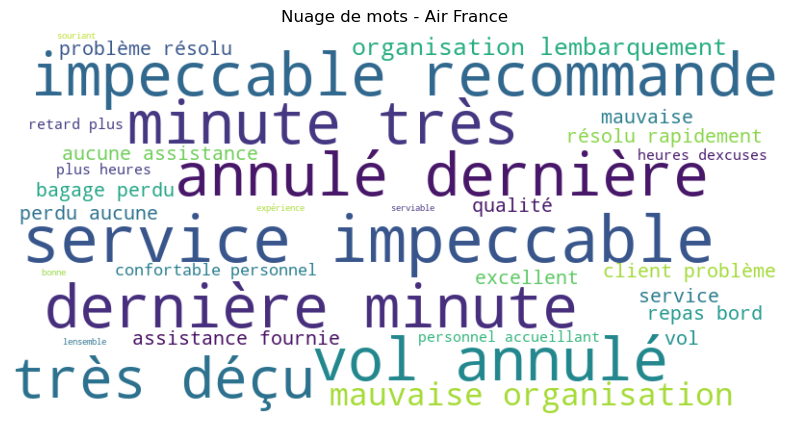

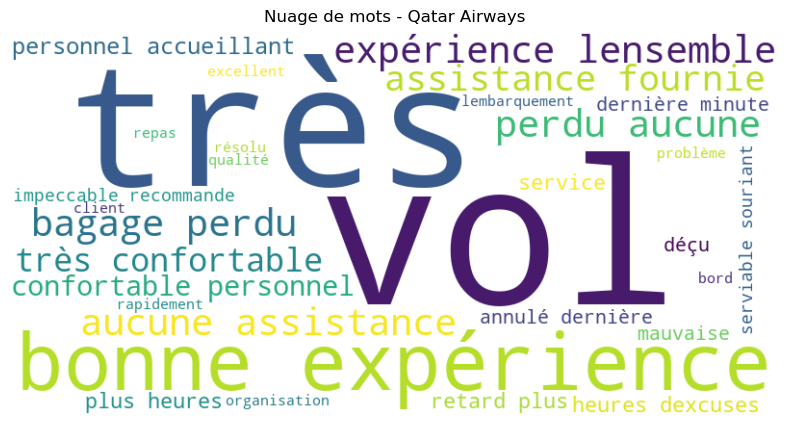

In [18]:

# Travaux Pratiques : Analyse et Traitement de Tweets de Compagnies Aériennes

## Objectifs pédagogiques
# - Charger et inspecter les données
# - Effectuer des analyses statistiques sur des données catégorielles
# - Prétraiter et analyser du texte
# - Visualiser les résultats

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Télécharger les stopwords si nécessaire
nltk.download('punkt')
nltk.download('stopwords')

# 1. Chargement et inspection des données
df = pd.read_csv('tweets_compagnies_aeriennes.csv')
print(df.head())
print(df.info())

# 2. Comptage des données catégorielles
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='company', order=df['company'].value_counts().index)
plt.title('Nombre de tweets par compagnie')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='user_type', order=df['user_type'].value_counts().index)
plt.title("Nombre de tweets par type d'utilisateur")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
plt.title("Répartition des sentiments")
plt.show()

# 3. Résumé des types d'utilisateurs
summary_user_type = df.groupby('user_type').agg(
    nombre_tweets=('tweet_id','count'),
    moyenne_tweets=('tweet_id','size')
).reset_index()
print(summary_user_type)

# 4. Prétraitement du texte : tokénisation et nettoyage
stop_words = set(stopwords.words('french'))

def nettoyer_texte(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Zéèêàùç ]', '', text)
    tokens = word_tokenize(text, language='french')
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(nettoyer_texte)
print(df[['text','clean_text']].head())

# 5. Comptage des mots les plus fréquents
from collections import Counter
all_words = ' '.join(df['clean_text']).split()
word_counts = Counter(all_words)
print(word_counts.most_common(10))

# 6. Nuage de mots global
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots global")
plt.show()

# 7. Nuages de mots par compagnie
for company in df['company'].unique():
    company_text = ' '.join(df[df['company'] == company]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(company_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots - {company}")
    plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Aperçu des données :
   tweet_id user_name    user_type  \
0         1   user_33          bot   
1         2   user_83          bot   
2         3   user_94  influenceur   
3         4   user_81    compagnie   
4         5   user_22    compagnie   

                                                text          company  \
0              Personnel très serviable et souriant.         Emirates   
1         Bagage perdu et aucune assistance fournie.  British Airways   
2              Personnel très serviable et souriant.        Lufthansa   
3            Mauvaise organisation à l'embarquement.         Emirates   
4  Excellent service client, problème résolu rapi...       Air France   

         date sentiment  
0  2023-07-20   négatif  
1  2023-05-09    neutre  
2  2023-08-23   négatif  
3  2023-04-25   négatif  
4  2023-01-25    neutre  

Valeurs manquantes :
tweet_id     0
user_name    0
user_type    0
text         0
company      0
date         0
sentiment    0
dtype: int64

2. Nombre d

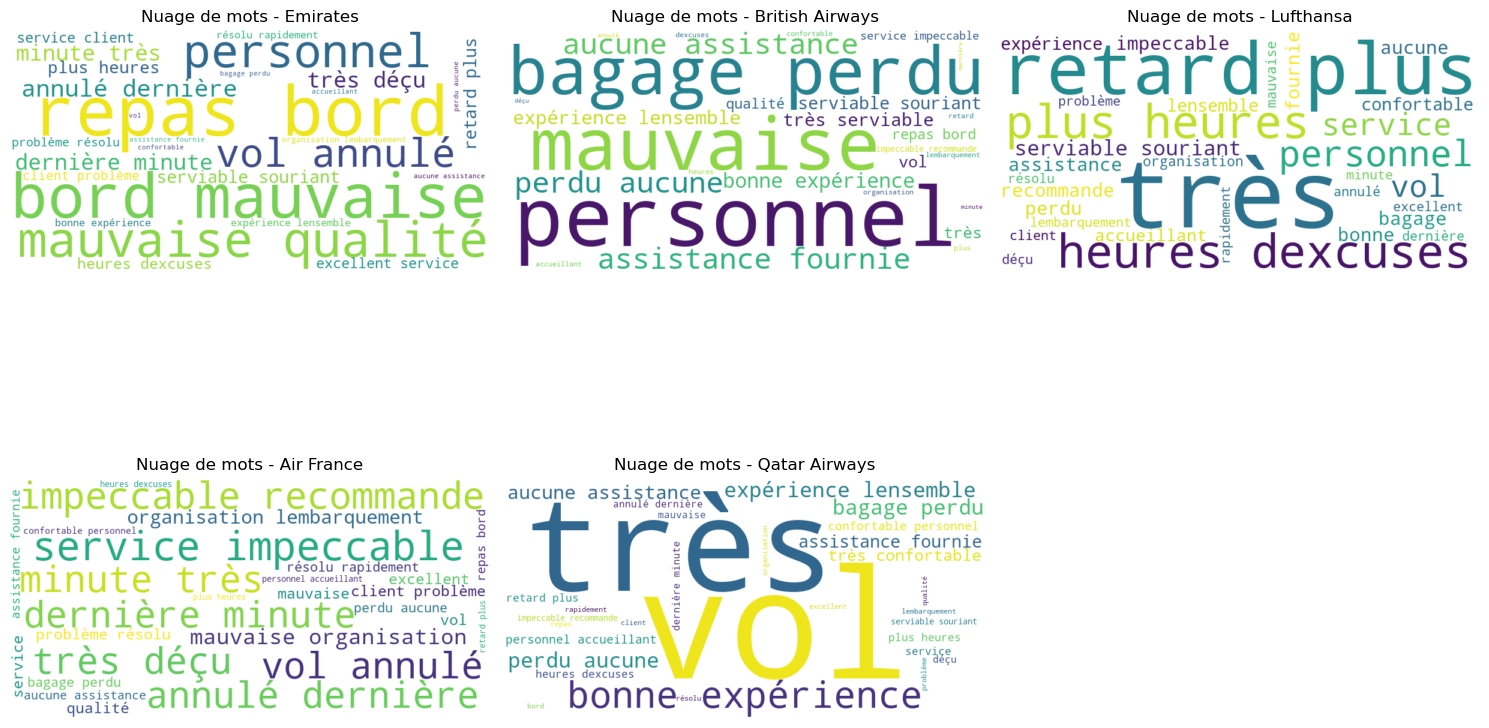


11. Score moyen de sentiment par compagnie :
           company  score_sentiment
0       Air France        -0.023256
1  British Airways        -0.025000
2         Emirates        -0.108696
3        Lufthansa         0.000000
4    Qatar Airways         0.121951


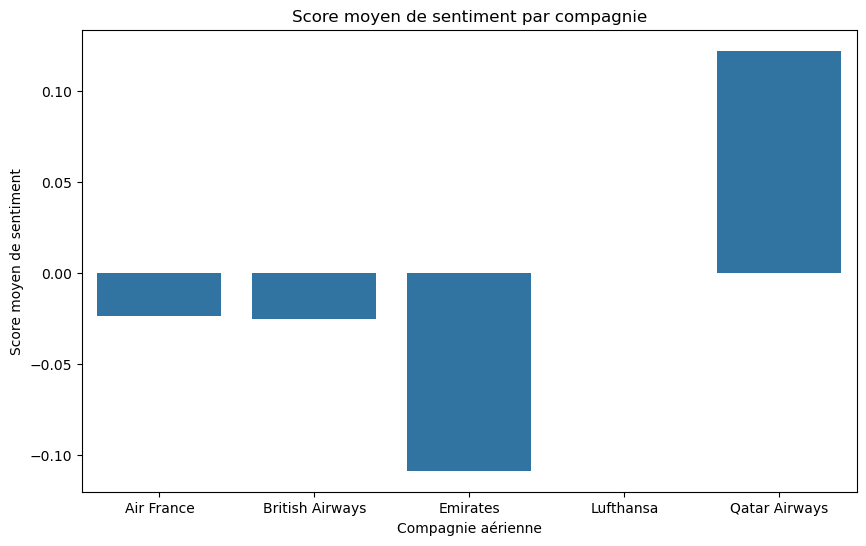


12. Résumé du contenu par compagnie :

Emirates:
Total des tweets : 46
Phrases les plus courantes :
- Repas à bord de mauvaise qualité.: 9 occurrences
- Vol annulé à la dernière minute, très déçu.: 6 occurrences
- Bonne expérience dans l'ensemble.: 5 occurrences

British Airways:
Total des tweets : 40
Phrases les plus courantes :
- Bagage perdu et aucune assistance fournie.: 7 occurrences
- Bonne expérience dans l'ensemble.: 7 occurrences
- Personnel très serviable et souriant.: 6 occurrences

Lufthansa:
Total des tweets : 30
Phrases les plus courantes :
- Retard de plus de 3 heures, pas d'excuses...: 8 occurrences
- Personnel très serviable et souriant.: 4 occurrences
- Bagage perdu et aucune assistance fournie.: 3 occurrences

Air France:
Total des tweets : 43
Phrases les plus courantes :
- Service impeccable, je recommande !: 7 occurrences
- Vol annulé à la dernière minute, très déçu.: 7 occurrences
- Mauvaise organisation à l'embarquement.: 7 occurrences

Qatar Airways:
Total des 

In [21]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données
import nltk  # Pour le traitement du langage naturel
from nltk.tokenize import word_tokenize  # Pour découper le texte en mots
from nltk.corpus import stopwords  # Pour les mots vides (stop words)
import re  # Pour les expressions régulières
from collections import Counter  # Pour compter les occurrences
from wordcloud import WordCloud  # Pour générer des nuages de mots
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns  # Pour des graphiques plus esthétiques

# Téléchargement des ressources NLTK pour le français
nltk.download('punkt')  # Modèle de tokenization
nltk.download('stopwords')  # Liste des mots vides

# Chargement des données depuis le fichier CSV
data = pd.read_csv('tweets_compagnies_aeriennes.csv')

# 1. Affichage de l'aperçu des données et vérification des valeurs manquantes
print("1. Aperçu des données :")
print(data.head())
print("\nValeurs manquantes :")
print(data.isnull().sum())

# 2. Nombre de tweets par compagnie aérienne
print("\n2. Nombre de tweets par compagnie :")
tweets_par_compagnie = data['company'].value_counts()
print(tweets_par_compagnie)

# 3. Nombre de tweets par type d'utilisateur
print("\n3. Nombre de tweets par type d'utilisateur :")
tweets_par_type = data['user_type'].value_counts()
print(tweets_par_type)

# 4. Répartition des sentiments
print("\n4. Répartition des sentiments :")
repartition_sentiments = data['sentiment'].value_counts()
print(repartition_sentiments)

# 5. Tableau récapitulatif : Nombre moyen de tweets par type d'utilisateur
print("\n5. Nombre moyen de tweets par type d'utilisateur :")
moyenne_tweets_par_type = data.groupby('user_type').size().reset_index(name='count')
moyenne_tweets_par_type['moyenne'] = moyenne_tweets_par_type['count'] / data['user_type'].nunique()
print(moyenne_tweets_par_type[['user_type', 'count', 'moyenne']])

# 6. Type d'utilisateur le plus actif
type_plus_actif = tweets_par_type.idxmax()
nombre_tweets_plus_actif = tweets_par_type.max()
print(f"\n6. Type d'utilisateur le plus actif : {type_plus_actif} avec {nombre_tweets_plus_actif} tweets")

# 7. Tokenization : Découpage des tweets en mots
data['tokens'] = data['text'].apply(lambda x: word_tokenize(x.lower()))

# 8. Nettoyage du texte : suppression des mots vides, mentions, liens et caractères spéciaux
stop_words = set(stopwords.words('french'))  # Chargement des mots vides français

def nettoyer_texte(tokens):
    """
    Nettoie une liste de tokens en :
    - supprimant les mentions (@)
    - supprimant les liens
    - supprimant les caractères spéciaux
    - supprimant les mots vides
    """
    # Suppression des mentions, liens et caractères spéciaux
    nettoyes = [re.sub(r'[@#]\w+|[^\w\s]|\d+|\n', '', token) for token in tokens]
    # Filtrage des mots vides et des tokens vides
    nettoyes = [token for token in nettoyes if token and token not in stop_words]
    return nettoyes

data['tokens_nettoyes'] = data['tokens'].apply(nettoyer_texte)

# 9. Comptage et affichage des 10 mots les plus fréquents
tous_mots = [mot for tokens in data['tokens_nettoyes'] for mot in tokens]
comptage_mots = Counter(tous_mots)
print("\n9. Top 10 des mots les plus fréquents :")
for mot, compte in comptage_mots.most_common(10):
    print(f"{mot}: {compte}")

# 10. Génération de nuages de mots pour chaque compagnie
plt.figure(figsize=(15, 10))
compagnies = data['company'].unique()

for i, compagnie in enumerate(compagnies, 1):
    # Extraction des tweets pour la compagnie courante
    tweets_compagnie = data[data['company'] == compagnie]['tokens_nettoyes']
    # Concaténation de tous les mots
    tous_mots_compagnie = ' '.join([mot for tokens in tweets_compagnie for mot in tokens])
    
    # Création du nuage de mots
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white', 
                         min_font_size=10).generate(tous_mots_compagnie)
    
    # Affichage du nuage de mots
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots - {compagnie}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 11. Comparaison des sentiments moyens entre compagnies
# Conversion des sentiments en valeurs numériques
correspondance_sentiments = {'positif': 1, 'neutre': 0, 'négatif': -1}
data['score_sentiment'] = data['sentiment'].map(correspondance_sentiments)

# Calcul du score moyen par compagnie
moyenne_sentiment_par_compagnie = data.groupby('company')['score_sentiment'].mean().reset_index()
print("\n11. Score moyen de sentiment par compagnie :")
print(moyenne_sentiment_par_compagnie)

# Visualisation des scores moyens
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='score_sentiment', data=moyenne_sentiment_par_compagnie)
plt.title('Score moyen de sentiment par compagnie')
plt.ylabel('Score moyen de sentiment')
plt.xlabel('Compagnie aérienne')
plt.show()

# 12. Résumé du contenu textuel par compagnie
print("\n12. Résumé du contenu par compagnie :")
for compagnie in compagnies:
    tweets_compagnie = data[data['company'] == compagnie]['text']
    phrases_communes = tweets_compagnie.value_counts().head(3)
    print(f"\n{compagnie}:")
    print(f"Total des tweets : {len(tweets_compagnie)}")
    print("Phrases les plus courantes :")
    for phrase, compte in phrases_communes.items():
        print(f"- {phrase}: {compte} occurrences")